In [302]:
import pandas as pds
import seaborn as sbn
import numpy as npy
import matplotlib.pyplot as plb

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data_life = pds.read_csv('life-expectancy.csv')
data_life.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [303]:
data_life.shape

(2938, 22)

In [304]:
data_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [305]:
data_life.drop(['Country', 'Status'], axis=1, inplace=True)

In [306]:
data_life.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [307]:
data_life['Life expectancy '].fillna(data_life['Life expectancy '].median(), inplace=True)

data_life['Adult Mortality'].fillna(data_life['Adult Mortality'].median(), inplace=True)

data_life['Alcohol'].fillna(data_life['Alcohol'].median(), inplace=True)

data_life['Hepatitis B'].fillna(data_life['Hepatitis B'].median(), inplace=True)

data_life[' BMI '].fillna(data_life[' BMI '].median(), inplace=True)

data_life['Polio'].fillna(data_life['Polio'].median(), inplace=True)

data_life['Total expenditure'].fillna(data_life['Total expenditure'].median(), inplace=True)

data_life['Diphtheria '].fillna(data_life['Diphtheria '].median(), inplace=True)

data_life['GDP'].fillna(data_life['GDP'].median(), inplace=True)

data_life['Population'].fillna(data_life['Population'].median(), inplace=True)

data_life[' thinness  1-19 years'].fillna(data_life[' thinness  1-19 years'].median(), inplace=True)

data_life[' thinness 5-9 years'].fillna(data_life[' thinness 5-9 years'].median(), inplace=True)

data_life['Income composition of resources'].fillna(data_life['Income composition of resources'].median(), inplace=True)

data_life['Schooling'].fillna(data_life['Schooling'].median(), inplace=True)


data_life.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [308]:
data_life.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2938.000000      2938.000000    2938.000000   
mean   2007.518720         69.234717       164.725664      30.303948   
std       4.613841          9.509115       124.086215     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.200000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.600000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.546875              738.251295    83.022124    2419.592240   
std       3.921946             1987.914858    22.996984   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       1.092500                4.685343    82.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.390000              441.534144    96.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2938.000000         2938.000000  2938.000000        2938.000000   
mean     38.381178           42.035739    82.617767           5.924098   
std      19.935375          160.445548    23.367166           2.400770   
min       1.000000            0.000000     3.000000           0.370000   
25%      19.400000            0.000000    78.000000           4.370000   
50%      43.500000            4.000000    93.000000           5.755000   
75%      56.100000           28.000000    97.000000           7.330000   
max      87.300000         2500.000000    99.000000          17.600000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2938.000000  2938.000000    2938.000000  2.938000e+03   
mean     82.393125     1.742103    6611.523863  1.023085e+07   
std      23.655562     5.077785   13296.603449  5.402242e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     580.486996  4.189172e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    4779.405190  4.584371e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2938.000000          2938.000000   
mean                4.821886             4.852144   
std                 4.397621             4.485854   
min                 0.100000             0.100000   
25%                 1.600000             1.600000   
50%                 3.300000             3.300000   
75%                 7.100000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2938.000000  2938.000000  
mean                          0.630362    12.009837  
std                           0.205140     3.265139  
min                           0.000000     0.000000  
25%                           0.504250    10.300000  
50%                           0.677000    12.300000  
75%                           0.772000    14.100000  
max                           0.948000    20.700000

<Figure size 720x576 with 0 Axes>

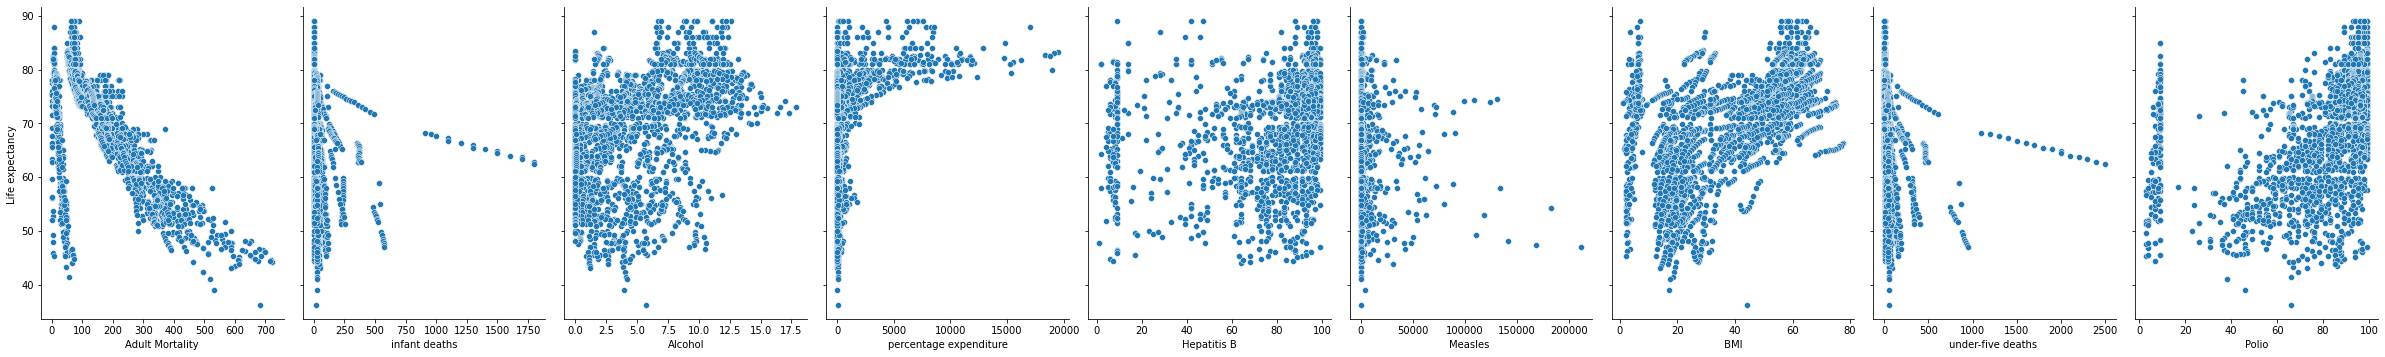

In [299]:
plb.figure(figsize=(10,8))

sbn.pairplot(data=data_life, x_vars=['Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ',' BMI ','under-five deaths ','Polio'], y_vars=['Life expectancy '], size=5, aspect=0.75)

<Figure size 720x576 with 0 Axes>

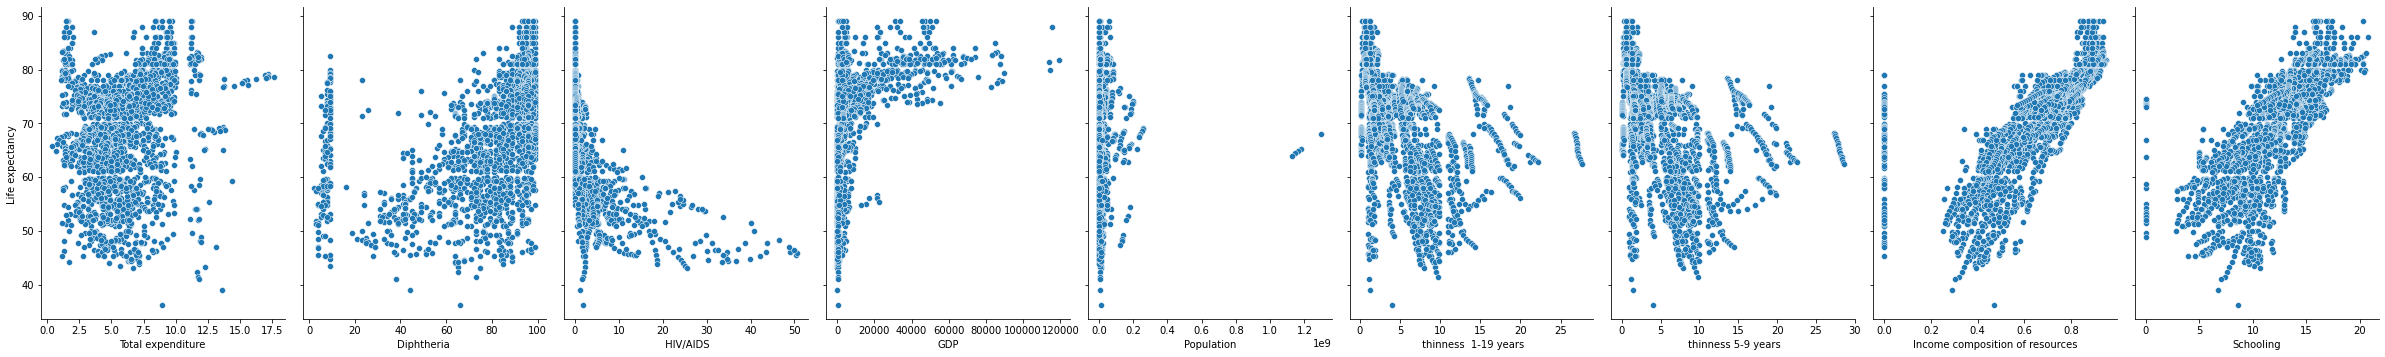

In [300]:
plb.figure(figsize=(10,8))
sbn.pairplot(data=data_life, x_vars=['Total expenditure','Diphtheria ',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years','Income composition of resources','Schooling'], y_vars=['Life expectancy '], size=5, aspect=0.75)

In [256]:
#data_life.drop(['Measles ','Adult Mortality','infant deaths','under-five deaths ',' HIV/AIDS',' thinness  1-19 years',' thinness 5-9 years'], axis=1, inplace=True)

In [272]:
#plb.figure(figsize=(10,8))
#sbn.pairplot(data=data_life, x_vars=data_life.drop(columns='Life expectancy '), y_vars=['Life expectancy '], size=5, aspect=0.75)

In [309]:
x = data_life.drop(columns='Life expectancy ')
y = data_life['Life expectancy ']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train)

print(lin_reg.coef_)
print(lin_reg.intercept_)

[-1.79976589e-02 -2.02009108e-02  9.31383537e-02  9.45899591e-02
  4.33332076e-05 -1.64129850e-02 -3.58073131e-05  4.29061019e-02
 -6.94923729e-02  2.89483824e-02  1.71145090e-01  4.36657865e-02
 -4.47731215e-01  5.52902186e-05  6.65474261e-11 -1.25547651e-01
  5.33575167e-02  6.62962884e+00  5.78871265e-01]
90.77355513229367


In [310]:
lin_reg.score(x_test, y_test)

0.820302512650239

In [291]:
lin_reg.predict(x_test)

array([77.2205231 , 65.95504958, 53.08490427, ..., 76.54954519,
       64.37740398, 73.96974784])

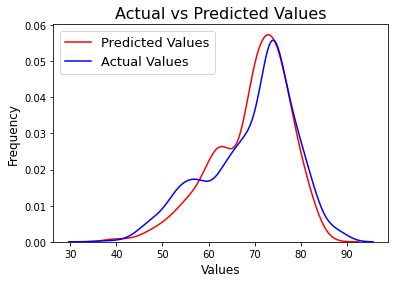

In [292]:
sbn.distplot(lin_reg.predict(x_test), hist = False, color = 'r', label = 'Predicted Values')
sbn.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plb.title('Actual vs Predicted Values', fontsize = 16)
plb.xlabel('Values', fontsize = 12)
plb.ylabel('Frequency', fontsize = 12)
plb.legend(loc = 'upper left', fontsize = 13)